# **Mini Project**
## **Project Description**
The data scientists at BigMart have collected 2013 sales data for 1559 products across 10 stores in different cities. Also, certain attributes of each product and store have been defined.

**The aim of this data science project is to build a predictive model and find out the sales of each product at a particular store.**


Using this model, BigMart will try to understand the properties of products and stores which play a key role in increasing sales.

# **1. Upload and Inspect the dataset**

In [3]:
import zipfile

zipfile_path = '/content/BigMart.zip'
zip_ref = zipfile.ZipFile(zipfile_path,'r')
zip_ref.extractall()
zip_ref.close()

In [4]:
import pandas as pd
# Read the dataset
train_dataset = pd.read_csv('/content/Train.csv')
test_dataset = pd.read_csv('/content/Test.csv')
train_dataset.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [5]:
train_dataset.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

Here we can see the columns name where each one specify a certain attribute where..

**Item_identifier:** is like the primary key for each product.

**Item_weight:** specify the weight of the product.

**Item_fat_content:** specify the fats concentration in the product.

**Item_visibility:** specify the precentage of total display area of all similar products in a store.

**Item_typ:** specif the type of the products (soft drink, dairy,...).

**Outlet_Identifier:**  Store ID.

**Outlet_Establishment_Year:** The year in which store was established.

**Outlet_size:** Is The size of the store.

**Outlet_location_typ:** In Terms of city Tiers (Size).

**outlet_type:** Grocery store or a type of supermarket.

**Item_Outlet_Sales:** Sales of the product In the Specific outlet.


# **Generating Hypothesis**

I think that from those attributes, there will be some that affects the sales by largerate as:
1. Fat_content: as now the mentality of healthy lifestyle is expanding
2. Item_type: it also will depend on the lifestyle of people in this area
3. Outlet_size: as by increasing the size the visibility of products will increase.
4. Outlet_type: as a type of luxury (by getting better outlet type(1), the sales increases)

And thus will be relayed with the year of establishment, as there will be more ability to make the outlet bigger and more trusted.

## **Cleaning the dataset**

In [6]:
# Print the unique values is 'Item_Fat_Content'
print(f"Unique categories in training Item_Fat_content: {train_dataset['Item_Fat_Content'].unique()}")
print(f"Unique categories in testing Item_Fat_content: {test_dataset['Item_Fat_Content'].unique()}")

Unique categories in training Item_Fat_content: ['Low Fat' 'Regular' 'low fat' 'LF' 'reg']
Unique categories in testing Item_Fat_content: ['Low Fat' 'reg' 'Regular' 'LF' 'low fat']


So, here we have unclear data which may cause problems where,

LF, low fat == Low Fat

reg == Regular

In [7]:
# Replace the data to be all Low Fat and Regular only

train_dataset['Item_Fat_Content'].replace('LF', 'Low Fat', inplace= True)
train_dataset['Item_Fat_Content'].replace('low fat', 'Low Fat', inplace= True)
train_dataset['Item_Fat_Content'].replace('reg', 'Regular', inplace= True)

test_dataset['Item_Fat_Content'].replace('LF', 'Low Fat', inplace= True)
test_dataset['Item_Fat_Content'].replace('low fat', 'Low Fat', inplace= True)
test_dataset['Item_Fat_Content'].replace('reg', 'Regular', inplace= True)

In [8]:
train_dataset['Item_Fat_Content']. unique()


array(['Low Fat', 'Regular'], dtype=object)

In [9]:
#show the unique values in the Item_Type

print(f"Unique categories in training Item_Type: {train_dataset['Item_Type'].unique()}")
print()
print(f"Unique categories in testing Item_Type: {test_dataset['Item_Type'].unique()}")


Unique categories in training Item_Type: ['Dairy' 'Soft Drinks' 'Meat' 'Fruits and Vegetables' 'Household'
 'Baking Goods' 'Snack Foods' 'Frozen Foods' 'Breakfast'
 'Health and Hygiene' 'Hard Drinks' 'Canned' 'Breads' 'Starchy Foods'
 'Others' 'Seafood']

Unique categories in testing Item_Type: ['Snack Foods' 'Dairy' 'Others' 'Fruits and Vegetables' 'Baking Goods'
 'Health and Hygiene' 'Breads' 'Hard Drinks' 'Seafood' 'Soft Drinks'
 'Household' 'Frozen Foods' 'Meat' 'Canned' 'Starchy Foods' 'Breakfast']


In [10]:
# Check on Outlet_Size categories

print(f"Unique categories in training Outlet_Size: {train_dataset['Outlet_Size'].unique()}")
print(f"Unique categories in testing Outlet_Size: {test_dataset['Outlet_Size'].unique()}")


Unique categories in training Outlet_Size: ['Medium' nan 'High' 'Small']
Unique categories in testing Outlet_Size: ['Medium' nan 'Small' 'High']


here we have 3 categories and some nulls that we will handle them..


# **Handling null values**

In [11]:
train_dataset.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

I thinks that the weight isn't an effective attribute on the sales of the store where people will buy the thing nomatter what is its weight if they really need it.

 So, I will drop the Item_weight column.

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


In [13]:
# Drop Item_weight Column
train_dataset.drop(['Item_Weight'] , axis = 1, inplace=True)
test_dataset.drop(['Item_Weight'] , axis = 1, inplace=True)

In [14]:
train_dataset.head()

,Item_Identifier,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [15]:
train_dataset.isnull().sum()

Item_Identifier                 0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

After dropping the Item_weight column I will deal with the outlet_size as following

If we look indeep in the data we will see that:

there are certain outlet_identifiers that has all its outlet size is null.
So, in this case we can't fill the null valuesaccording to the outlet_identifiers

So to solve this problem we will fill the null values with 'unspecified' word, as we can't detect the size of the outlet



In [16]:
train_dataset.fillna('Unspecified', axis=1, inplace=True)
test_dataset.fillna('Unspecified', axis=1, inplace=True)

In [17]:
train_dataset.isnull().sum()

Item_Identifier              0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [18]:
train_dataset['Item_Fat_Content'].unique()

array(['Low Fat', 'Regular'], dtype=object)

## **Handling Outliers**

In [22]:
train_dataset.describe()

,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,8523.000000,8523.000000,8523.000000,8523.000000
mean,0.066132,140.992782,1997.831867,2181.288914
std,0.051598,62.275067,8.371760,1706.499616
min,0.000000,31.290000,1985.000000,33.290000
25%,0.026989,93.826500,1987.000000,834.247400
50%,0.053931,143.012800,1999.000000,1794.331000
75%,0.094585,185.643700,2004.000000,3101.296400
max,0.328391,266.888400,2009.000000,13086.964800


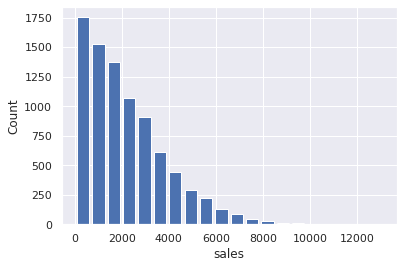

In [34]:
plt.hist(train_dataset['Item_Outlet_Sales'], bins=20, rwidth=0.8)
plt.xlabel('sales')
plt.ylabel('Count')
plt.show()

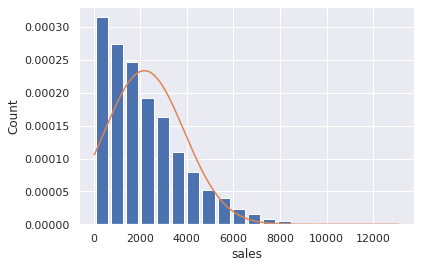

In [33]:
from scipy.stats import norm
import numpy as np
plt.hist(train_dataset['Item_Outlet_Sales'], bins=20, rwidth=0.8, density=True)
plt.xlabel('sales')
plt.ylabel('Count')

rng = np.arange(train_dataset['Item_Outlet_Sales'].min(), train_dataset['Item_Outlet_Sales'].max(), 0.1)
plt.plot(rng, norm.pdf(rng,train_dataset['Item_Outlet_Sales'].mean(),train_dataset['Item_Outlet_Sales'].std()))

{'whiskers': [<matplotlib.lines.Line2D at 0x7f4e438722d0>,
 'caps': [<matplotlib.lines.Line2D at 0x7f4e43816550>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f4e43810590>],
 'medians': [<matplotlib.lines.Line2D at 0x7f4e4381c050>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f4e4381c590>],
 'means': []}

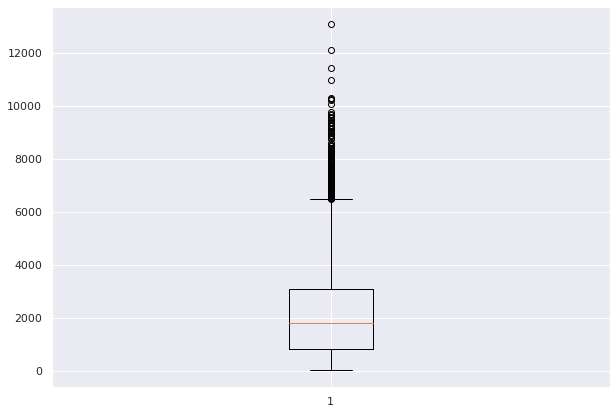

In [27]:
fig = plt.figure(figsize =(10, 7))
plt.boxplot(train_dataset['Item_Outlet_Sales'])

This shows rhat we have alot of outlayes....

So, I will use **3 standard deviation** to solve the problem of outliers

In [35]:
upper_limit = train_dataset['Item_Outlet_Sales'].mean() + 3*train_dataset['Item_Outlet_Sales'].std()
upper_limit

7300.787760776531

In [36]:
lower_limit = train_dataset['Item_Outlet_Sales'].mean() -3*train_dataset['Item_Outlet_Sales'].std()
lower_limit

-2938.2099336264673

In [37]:
train_dataset[(train_dataset['Item_Outlet_Sales']>upper_limit) | (train_dataset['Item_Outlet_Sales']<lower_limit)]

,Item_Identifier,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,z_score
130,FDY25,Low Fat,0.033810,Canned,180.5976,OUT027,1985,Medium,Tier 3,Supermarket Type3,7968.2944,3.391155
145,FDP16,Low Fat,0.039356,Frozen Foods,246.3802,OUT049,1999,Medium,Tier 1,Supermarket Type1,7370.4060,3.040796
276,FDY55,Low Fat,0.081253,Fruits and Vegetables,256.4988,OUT013,1987,High,Tier 3,Supermarket Type1,7452.9652,3.089175
304,DRE60,Low Fat,0.159658,Soft Drinks,224.9720,OUT045,2002,Unspecified,Tier 2,Supermarket Type1,7696.6480,3.231972
333,FDN58,Regular,0.056597,Snack Foods,230.9984,OUT027,1985,Medium,Tier 3,Supermarket Type3,9267.9360,4.152739
...,...,...,...,...,...,...,...,...,...,...,...,...
7930,FDP15,Low Fat,0.083536,Meat,255.4330,OUT027,1985,Medium,Tier 3,Supermarket Type3,9227.9880,4.129329
8039,FDY55,Low Fat,0.081485,Fruits and Vegetables,258.0988,OUT045,2002,Unspecified,Tier 2,Supermarket Type1,8994.9580,3.992775
8201,FDO03,Regular,0.036704,Meat,228.1352,OUT027,1985,Medium,Tier 3,Supermarket Type3,9390.4432,4.224527
8245,FDU55,Low Fat,0.035967,Fruits and Vegetables,260.3278,OUT049,1999,Medium,Tier 1,Supermarket Type1,7549.5062,3.145748


In [40]:
train_dataset= train_dataset[(train_dataset['Item_Outlet_Sales']<upper_limit) & (train_dataset['Item_Outlet_Sales']>lower_limit)]
train_dataset.shape

(8433, 12)

# **Explore the data by Visualization**

### The relation between the outlet_Type and the Item_Outlet_Sales

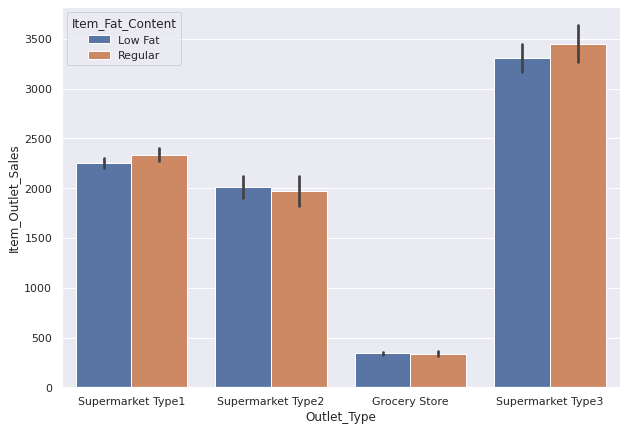

In [41]:
sns.set_theme(style="darkgrid")
fig = plt.figure(figsize =(10, 7))

sns.barplot(x='Outlet_Type' , y = 'Item_Outlet_Sales', hue = 'Item_Fat_Content', data= train_dataset)

In [42]:
train_dataset.Item_Fat_Content.describe()

count        8433
unique          2
top       Low Fat
freq         5459
Name: Item_Fat_Content, dtype: object

From this graph, We can say that the outlets with 'Grocery' type has the lowest sales, this measn that the theory of healthy lifestyle is failed with this dataset.

## The relation between the Item_Type and the Item_Outlet_Sales According to the Outlet_Type

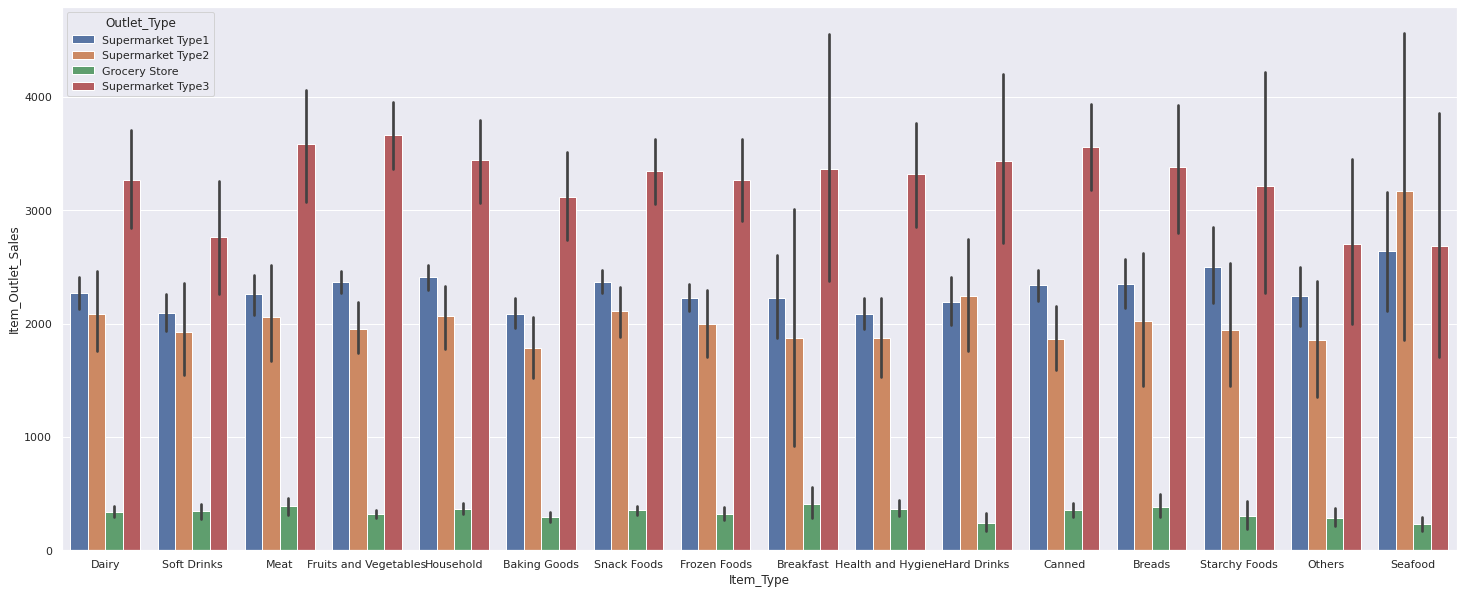

In [43]:
sns.set_theme(style="darkgrid")
fig = plt.figure(figsize =(25, 10))
sns.barplot( y = 'Item_Outlet_Sales' , hue= 'Outlet_Type'  , x = "Item_Type" , data= train_dataset)

This graph show that the outlet type: supermarket type 3 has the best sales in app products except for the Seafood, which is best sale in supermarket type 2

### The relation between the outlet_Type and the Item_Outlet_Sales according to the Outlet_size

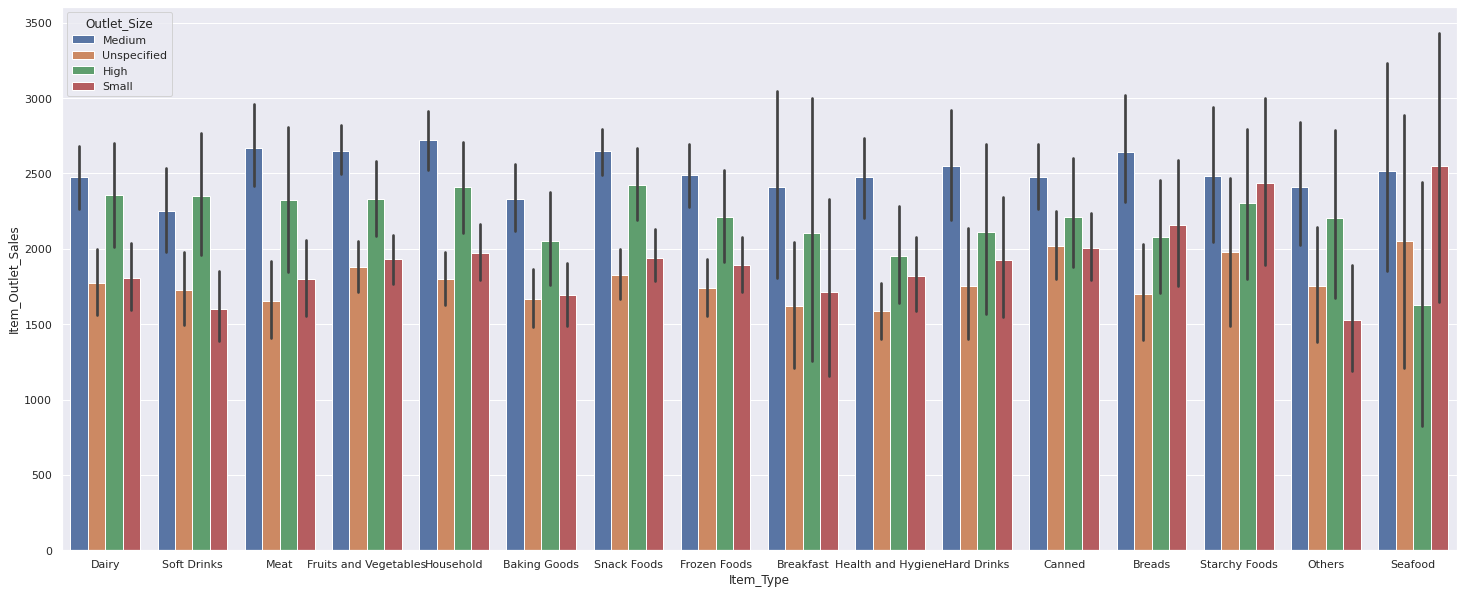

In [44]:
sns.set_theme(style="darkgrid")
fig = plt.figure(figsize =(25, 10))
sns.barplot( y = 'Item_Outlet_Sales' , hue= 'Outlet_Size'  , x = "Item_Type" , data= train_dataset)

### The relation between outlet_Size and Outlet_Type with related to the outlet_Sales


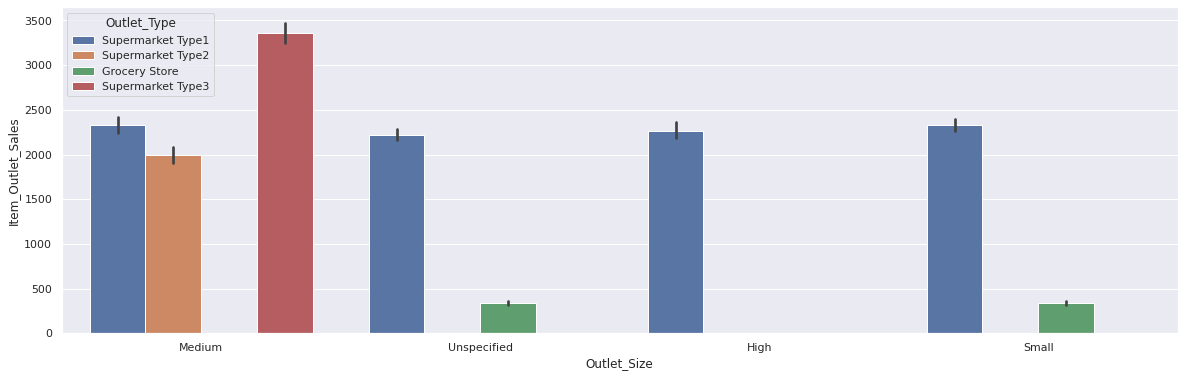

In [45]:
sns.set_theme()
sns.set_theme(style="darkgrid")
fig = plt.figure(figsize =(20, 6))
sns.barplot(x="Outlet_Size", y="Item_Outlet_Sales", hue="Outlet_Type", data=train_dataset)


This graph shows that:


*   Supermarket type 3 has the highest sales in the category of medium size 
*   Supermarket type 1 has equal sales rate in all categories



In [46]:
supermarket = train_dataset.groupby(train_dataset['Outlet_Type'])
supermarket.size()

Outlet_Type
Grocery Store        1083
Supermarket Type1    5547
Supermarket Type2     928
Supermarket Type3     875
dtype: int64

## **Continue cleaning the data**

### **Converting the categorical data into numerical form**
Thus by Label Encoder.

In [47]:
categorical_columns = train_dataset.select_dtypes(include=['object']).columns.tolist()
categorical_columns

['Item_Identifier',
 'Item_Fat_Content',
 'Item_Type',
 'Outlet_Identifier',
 'Outlet_Size',
 'Outlet_Location_Type',
 'Outlet_Type']

In [48]:

from sklearn.preprocessing import LabelEncoder

LE = LabelEncoder()
for column in categorical_columns:
  labels = LE.fit_transform(train_dataset[column])
  train_dataset.drop(column, axis=1, inplace=True)
  train_dataset[column] = labels

for column in categorical_columns:
  labels = LE.fit_transform(test_dataset[column])
  test_dataset.drop(column, axis=1, inplace=True)
  test_dataset[column] = labels


In [49]:
train_dataset.head()

,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales,z_score,Item_Identifier,Item_Fat_Content,Item_Type,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,0.016047,249.8092,1999,3735.1380,0.910548,156,0,4,9,1,0,1
1,0.019278,48.2692,2009,443.4228,-1.018381,8,1,14,3,1,2,2
2,0.016760,141.6180,1999,2097.2700,-0.049235,662,0,10,9,1,0,1
3,0.000000,182.0950,1998,732.3800,-0.849053,1121,1,6,0,3,2,0
4,0.000000,53.8614,1987,994.7052,-0.695332,1297,0,9,1,0,2,1


## **Building the model**

In [50]:
# Prepare our data 
Y = train_dataset['Item_Outlet_Sales']
features = ['Item_Fat_Content', 'Item_Visibility', 'Item_Type', 'Item_MRP', 'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type']
X = train_dataset[features]

In [51]:
from sklearn.model_selection import train_test_split
X_train, X_Validation, Y_train, Y_Validation= train_test_split(X, Y, test_size= 0.2)

## **Linear Regression Model**

In [52]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error


LR_model = LinearRegression()
LR_model.fit(X_train, Y_train)
LR_prediction = LR_model.predict(X_Validation)
LR_Validation_MSE = mean_absolute_error(LR_prediction, Y_Validation)
print(f'Mean Square Error for Linear Regression Model is: {LR_Validation_MSE}')

Mean Square Error for Linear Regression Model is: 849.1964179753128


## **Random Forest Model**

In [53]:
from sklearn.ensemble import RandomForestRegressor

RF_model = RandomForestRegressor(random_state=1)
RF_model.fit(X_train, Y_train)
RF_prediction = RF_model.predict(X_Validation)
RF_Validation_MSE = mean_absolute_error(RF_prediction, Y_Validation)
print(f'Mean Square Error for Random Forest Model is: {RF_Validation_MSE}')

Mean Square Error for Random Forest Model is: 745.7961581055129


In [54]:
from xgboost import XGBRegressor

XGB_model = XGBRegressor()
XGB_model.fit(X_train, Y_train)
XGB_prediction = XGB_model.predict(X_Validation)
XGB_Validation_MSE = mean_absolute_error(XGB_prediction, Y_Validation)
print(f'Mean Square Error for XGBoost Model is: {XGB_Validation_MSE}')

[23:26:37] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Mean Square Error for XGBoost Model is: 707.9373316975682


**From trying several models we can say that the XGBRegressor in the best fitting model for our data.. so we will apply this model on the testing set.**

In [55]:
XGB_prediction = XGB_model.predict(test_dataset[features])
